
<font size = 1 color="gray">Introducción a la computación numérica y simbólica con Python</font>  

<img src="img/logo-vector-u-tad.jpg" align="left" >


# 5. Resolución numérica de ecuaciones diferenciales ordinarias

Una ecuación diferencial relaciona una magnitud con sus derivadas. La incógnita no es un valor numérico sino la función o funciones que cumplen la ecuación. La más simple posible es:

$df(t)/dt = 0$

La solución es cualquier función constante en el tiempo, esto es $f(t) = K$, ¿pero qué constante exactamente? Para eso es necesario un dato adicional, la condición inicial, por ejemplo $f(0) = 5$. Para esta ecuación trivial la solución general es $f_1(t) = 5$. 

Si en lugar de $f(0) = 5$ nos hubiesen dicho $f(0)=2$ también sería una solución, $f_2(t)=2$. Si ahora sumamos $f_1(t)+f_2(t)=7$ comprobamos que la suma de ambas funciones es también solución de $df/dt=0$. Es una ecuación diferencial lineal y tiene la propiedad de que la suma de sus soluciones es también solución.

Veamos otra ecuación:

$d^2f(t)/dt^2 = 5$

¿Qué función derivada dos veces arroja una constante distinta de 0? Un polinomio de segundo grado $at^2+bt+c$.

La resolución de ecuaciones diferenciales es posiblemente el campo del cálculo numérico más desarrollado.

## Método de Euler

El desarrollo teórico de los métodos más habituales excede los límites de esta introducción, por lo que solo se presentará el más simple, llamado de Euler. El alumno debe tener en cuenta que los paquetes numéricos de Ppython usan funciones matemáticas más avanzadas.

El método de Euler se basa en un idea muy sencilla. Sea $f(x)$ una función desconocida de la que sí sabemos el valor de su derivada $f'(t)$. Tomamos un punto cualquiera como origen $t_0$, del que conocemos $f'(0)$. En un punto muy próximo $t_1$, podríamos aproximar el valor $f(1) = f(0) + f'(0) h$, donde h es la diferencia $t_1-t_0$. Operando de manera iterativa, a partir de $f(1)$ y sabiendo cuanto vale $f'(1)$ encontraríamos el valor de $t_2$ y así sucesivamente. Es obvio que en cada aproximación se comete un error, por lo que el método de Euler solo se usa como ejemplo trivial.

Vamos a resolver la ecuación $dy/dt = cos(t)$, con la condición inicial $y(0)= 0$. La función que cumple esta condición es $sin(t)$.

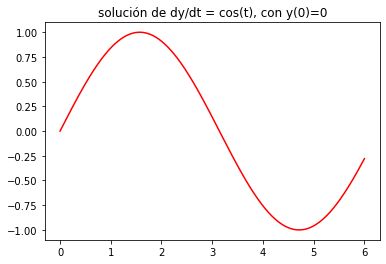

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt  
from scipy.integrate import solve_ivp

def Euler(f, ta, tb, ya, steps):
    h = (tb - ta) / steps
    t, y = ta, ya
    for i in range(steps):
        y += h * f(t, y)
        t += h
    return y

s = [0]                  #  Lista para almacenar los resultados de la integración
t = [0]                  #  Instantes de integración
pasos = 20               #  Número de pasos de integración por cada intervalo
intervalos = 1000        #  Número de intervalos de integración en total
ini = 0                  #  Valor inicial de t
fin = round(2*np.pi)     
h = 1/(intervalos*pasos) #  Anchura del paso de integración

for i in range(0,(fin-ini)*intervalos*pasos):
    s.append(Euler(lambda t,y: np.cos(t), t[-1], t[-1]+h, s[-1], pasos))
    t.append((t[-1]+h))
plt.title("solución de dy/dt = cos(t), con y(0)=0")
plt.plot(np.array(t),s, '-',color='red')
plt.show()


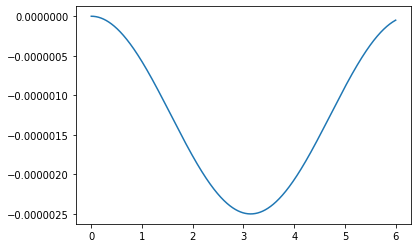

In [3]:
# Vamos a calcular el error cometido

error = np.sin(t)-s
plt.plot(t,error)

Otro ejemplo, la ecuación $dy/dt = 1/t$ con la condición $y(1) = 0$. La función que cumple estas condicines es $y(t) = ln(t)$ y solo está definida para valores positivos de $t$.

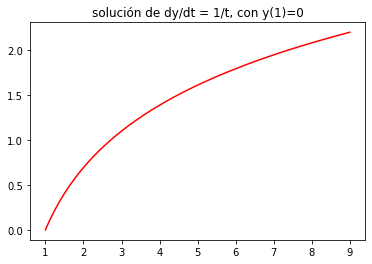

In [4]:
# solución de dx/dt = 1/x, con la condición inicial x(1) = 0
s = [0]
t = [1]
ini=1
fin=9
for i in range(1,(fin-ini)*intervalos*pasos):
    s.append(Euler(lambda t,y: 1/t, t[-1], t[-1]+h, s[-1], pasos))
    t.append(t[-1]+h)
plt.title("solución de dy/dt = 1/t, con y(1)=0")
plt.plot(t,s, '-',color='red')

## Integración numérica con SciPy

`Scipy` ofrece dos métodos de integración muy potentes. El más antiguo es `odeint`, que utiliza una librería FORTRAN. El más reciente se denomina `solve_ivp`. El usuario avanzado puede especificar qué método de integración debe emplearse o el paquete Python escogerá uno por defecto (Runge-Kutta(4,5) en `solve_ivp`).

## Ecuaciones diferenciales de primer orden

Resolvemos primero una EDO elemental, que aparece en multitud de procesos físicos. La variación de una magnitud es proporcional a su magnitud y con signo negativo. Esta circunstancia se produce en la desintegración de núcleos radiactivos o en la descarga de un condensador a través de una resistencia.

$\frac{dy}{dt} = - ky$

La solución analítica es simple $y(t)=A_{0}e^{-kt}$, donde $A_0$ es la cantidad inicial de la magnitud.

In [5]:
def fexpdecr(t,y):
    return np.array([k*y])

Condiciones iniciales:

In [6]:
k = -1.2
y0 = np.array([1000])
tini = 0
tfin = 2

Integramos y representamos la solución:

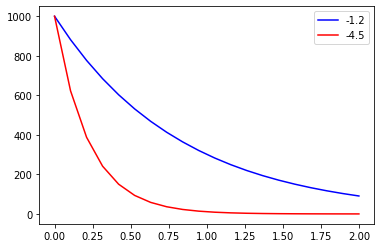

In [7]:
instantes = np.linspace(tini, tfin, 20)
sol = solve_ivp(fexpdecr, (tini, tfin), y0, t_eval = instantes )
plt.plot(sol.t, sol.y[0, :], '-',color='blue')

# Solución para otro valor de k
k=-4.5
sol = solve_ivp(fexpdecr, (tini, tfin), y0, t_eval = instantes)
plt.plot(sol.t, sol.y[0, :], '-',color='red')
plt.legend([-1.2,-4.5])

Si la constante de proporcionalidad es positiva, entonces se produce un crecimiento exponencial $f(x,t)=A_{0}e^{kt}$. Una colonia de bacterias es el ejemplo más habitual, si tuviesen recursos de alimento y espacio ilimitados crecerían de forma explosiva. Esto no sucede porque dichos recursos están limitados.

Para modelar este comportamiento, Verhulst propuso la ecuación logística:
$\frac{dN}{dt} = (k-\alpha N)N$
en la que $N$ es la variable dependiente que representa el número de individuos.

La idea es simple, la proporcionalidad no es constante sino que decrece con el valor de x (número de bacterias), hasta alcanzar un valor $N=\frac{k}{\alpha}$ en el que el crecimiento se detiene. La solución analítica de esta ecuación no es inmediata, se trata de la curva logística.

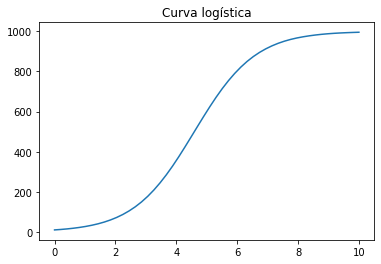

In [8]:
tini=0
tfin=10
k=1
N0 = np.array([10])
def flogist(t,N):
    alpha = 0.001
    return np.array([(k-alpha*N)*N])
instantes = np.linspace(tini, tfin, 50)
sol = solve_ivp(flogist, (tini, tfin), N0, t_eval = instantes )
plt.title("Curva logística")
plt.plot(sol.t, sol.y[0, :], '-')

### Ecuaciones de segundo orden

La ecuación diferencial de segundo orden más simple es el oscilador armónico y tiene la siguiente forma:

$m\frac{d^2x}{dt^2} = -kx$

Sea una masa $m$ situada sobre un plano, sujeta por uno de sus extremos a un resorte con constante elástica $k$. Se toma como origen de coordenadas la posición de reposo del resorte, aquella en que $F=0$. El plano es ideal y no produce fuerza de rozamiento sobre la masa. El desplazamiento respecto del punto origen es $x(t)$, que tiene valores positivos cuando es hacia la derecha y negativos, hacia la izquierda.

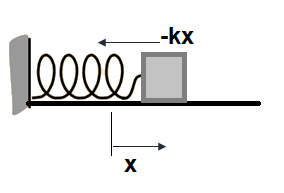

El sistema se describe con la ecuación diferencial $m\frac{d^2x}{dt^2} = -kx$, cuya solución general es $A cos(\omega_0 t) + B sin(\omega_0 t)$. 

Para calcular el valor de las constantes, hacen falta dos condiciones iniciales al tratarse de una ecuación de segundo grado. Imponemos arbitrariamente que la masa está inicialmente en el punto de máxima distancia de la posición de reposo (llamado $A$) y  que su velocidad en ese instante sea nula $\frac{dx}{dt}=0$. Con estas condiciones, se puede deducir que: 

$x(t) = A cos(\omega t)$, donde $\omega_0 = \sqrt{\frac{k}{m}}$ y $A$ es el desplazamiento máximo.

(Véase justificación en http://ific.uv.es/~nebot/Oscilaciones_y_Ondas/Tema_1.pdf)

Para resolver numéricamente esta ecuación, tenemos que convertirla en un conjunto de dos ecuaciones de primer orden. Para simplificar la notación, se puede escribir $x'$ para la primera derivada respecto a $t$, $x''$ para la segunda y así sucesivamente.

El sistema se modela entonces como:

$mx''+kx = 0$, que puede reescribirse como $x''+\omega_0^2 x = 0$

$u = 
\begin{pmatrix}
\dot{x} \\
x
\end{pmatrix}$

$\frac{d}{dt}
\begin{pmatrix}
\dot{x} \\ x
\end{pmatrix} =
\begin{pmatrix}
-\omega_0^2 x \\ \dot{x}
\end{pmatrix}$


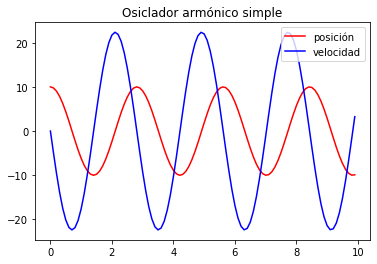

In [9]:
# Resolución numérica del oscilador armónico simple
from scipy.integrate import odeint      # Usaremos el paquete odeint aunque la documentación recomienda
                                        # emplear solve_ivp para nuevo software
def oscilador(x, t, omega_squared):
    return np.array([x[1], -omega_squared*x[0]]) # En este array se devuelven velocidad y aceleración
                                                 # En el primer valor, x[1], está la velocidad del instante anterior
                                                 # En el segundo, la aceleración del instante actual que es el 
                                                 # producto de w^2 por la posición anterior 

tini = 0
tfin = 10
paso = 0.1
instantes = np.arange(tini, tfin, paso)

x0 = [10,0]                 # Posición A=10 (en metros) y aceleración iniciales

masa = 0.5  # kg
kspring = 2.5  # N/m
omega_squared = kspring/masa
sol = odeint(oscilador, x0, instantes, 
             args=(omega_squared,))  # En args pasamos el valor de omegasquared
plt.plot(instantes, sol[:, 0], label="posición", color="red")
plt.plot(instantes, sol[:, 1], label="velocidad", color="blue")
plt.title("Osiclador armónico simple")
plt.legend()

La hipótesis de que no existe rozamiento no es realista. Vamos a suponer que hay una fuerza de rozamiento dinámico de magnitud proporcional a la velocidad de la masa y dirección opuesta al desplazamiento. Esto se consigue añadiendo un tercer elemento a la ecuación diferencial del oscilador:

$m\frac{d^2x}{dt^2} = -kx -b\frac{dx}{dt}$


Para resolver la ecuación, tenemos que tener en cuenta este término en la expresión:


$\frac{d}{dt}
\begin{pmatrix}
\dot{x} \\ x
\end{pmatrix} =
\begin{pmatrix}
-\omega_0^2 x - \frac{b}{m}\dot{x} \\ \dot{x} 
\end{pmatrix}$

Esta solución es amortiguada, pero pueden darse 3 circunstancias:
    
Si $b^{2}-4km>0$ el sistema está sobreamortiguado (amortiguamiento fuerte o supercrítico)

Si $b^{2}-4km=0$ el sistema tiene amortiguamiento crítico.

Si $b^{2}-4km<0$ el sistema oscila con amplitud decreciente (amortiguamiento débil o subcrítico)$

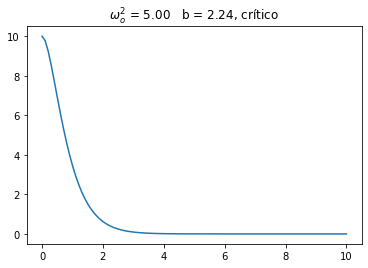

In [10]:
# Amortiguamiento crítico
bcrit = (2*np.sqrt(masa*kspring))

def osciladoramort(x, t, b, omega_squared):
    return np.array([x[1], -omega_squared*x[0]-(b/masa)*x[1]])

time_vec = np.linspace(0, 10, 100)
yinit = (10, 0)
ysol = odeint(osciladoramort, yinit, time_vec, args=(bcrit, omega_squared))
plt.title("$\omega_o^2$ = {:.2f}   b = {:.2f}, crítico".format(omega_squared,bcrit))
plt.plot(time_vec, ysol[:, 0], label='y')

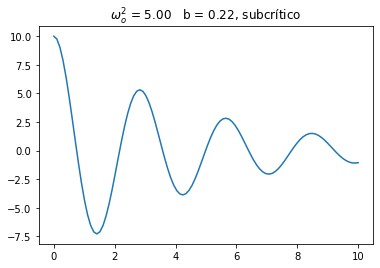

In [11]:
# Amortiguamiento subcrítico

bsub = 0.1*bcrit

ysol = odeint(osciladoramort, yinit, time_vec, args=(bsub, omega_squared))
plt.title("$\omega_o^2$ = {:.2f}   b = {:.2f}, subcrítico".format(omega_squared,bsub))
plt.plot(time_vec, ysol[:, 0], label='y')

En el análisis de sistemas suele usarse el diagrama de fases, en el que en lugar de representar una variable en función del tiempo, se representan pares de dos valores de variables para un mismo instante. Para el oscilador amortiguado es como sigue. Comparar con la gráfica temporal en la que se han dibujado a la vez posición y velocidad.

Text(0, 0.5, "$x'$")

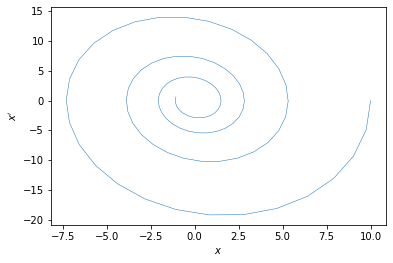

In [12]:
plt.plot(ysol[:,0], ysol[:,1],linewidth=0.5)
plt.xlabel('$x$')
plt.ylabel('$x\'$')

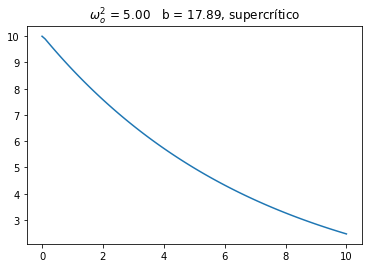

In [13]:
# Amorituamiento supercrítico

bsuper = 8*bcrit
ysol = odeint(osciladoramort, yinit, time_vec, args=(bsuper, omega_squared))
plt.title("$\omega_o^2$ = {:.2f}   b = {:.2f}, supercrítico".format(omega_squared,bsuper))
plt.plot(time_vec, ysol[:, 0], label='y')

## Ecuaciones no lineales

La potencia del cálculo numérico se revela cuando teemos que resolver ecuaciones diferenciales no  lineales, para las que no hay solución analítica o es muy complicada de obtener.

El oscilador de van der Pol fue descrito por el físico Balthasar van der Pol en 1927, trabajando con circuitos electrónicos de válvulas. Su fórmula es:

$\frac{d^{2}x} {dt^{2}}-\mu(1-x^{2})\frac{dx}{dt}+x=0$

Vemos que es un oscilador amortiguado, pero el coeficiente no es constante sino una función de $x^2$ lo que convierte la ecuación en no lineal. Para solucionarlo, tenemos que escribir el par de ecuaciones:


$\frac{d}{dt}
\begin{pmatrix}
\dot{x} \\ x
\end{pmatrix} =
\begin{pmatrix}
-x+ \mu(1-x^2)\dot{x} \\ \dot{x} 
\end{pmatrix}$

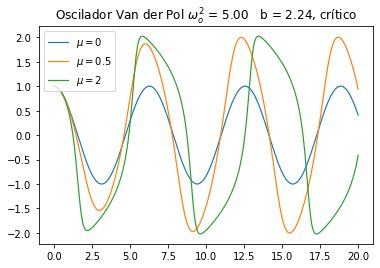

In [14]:
# Resolución del oscilador de van der Pol

def osciladorvdp(x, t, mu):
    return np.array([x[1],-x[0]+mu*(1-x[0]**2)*x[1]])


time_vec = np.linspace(0, 20, 500)
yinit = (1, 0)
mus = [0,0.5,2]
for mu in mus:
    ysol = odeint(osciladorvdp, yinit, time_vec, args=(mu,))
    plt.title("Oscilador Van der Pol $\omega_o^2$ = {:.2f}   b = {:.2f}, crítico".format(omega_squared,bcrit))
    plt.plot(time_vec, ysol[:, 0], label='y',linewidth=1.2)
plt.legend([f"$\mu={m}$" for m in mus])

Para $\mu=0$ no hay amortiguación y la gráfica es la de un oscilador armónico, para los otros valores vemos que la frecuencia parece variar con ese parámtero y la función tiene una forma extraña.

Veamos su diagrama de fases.

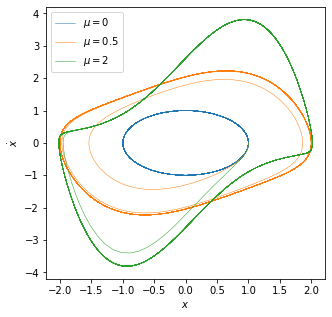

In [15]:
time_vec = np.linspace(0, 200, 5000)
plt.figure(figsize=(5,5)) 
for mu in (mus):
    ysol = odeint(osciladorvdp, yinit, time_vec, args=(mu,))
    plt.plot(ysol[:,0], ysol[:,1],linewidth=0.5)
    plt.xlabel('$x$')
    plt.ylabel('$\dot{x}$')
    
plt.legend([f"$\mu={m}$" for m in mus])

Se observa cómo aparecen órbitas que tienden hacia distintos atractores o ciclos-límite en función del valor del parámetro $\mu$. La dinámica de los sistemas lineales es muy rica, y el cálculo numérico resulta imprescindible para su estudio.

## Ecuaciones diferenciales acopladas

Hablamos de dos ecuaciones diferenciales acopladas cuando el valor de cada una de las magnitudes se expresa como una ecuación diferencial que depende en cada instante de la magnitud de la otra (o de sus derivadas) y viceversa. Ya hemos visto algo muy parecido para resolver las ecuaciones de segundo orden.

### Lotka-Volterra

Uno de los modelos de este tipo más conocidos son las ecuaciones de Lotka-Volterra, que simulan la interacción entre dos poblaciones, de depredadores y presas. Imaginemos una isla en la que solo viven zorros ($z$) y liebres ($l$). Si no hubiese interacción entre las especies y los recursos hídricos y vegetales fueran ilimitados, podríamos escribir:

$\frac{dl}{dt} = r_l l$ , donde $r_l$ es la tasa de crecimiento de liebres en ausencia de depredadores, igual a la tasa de nacimientos menos muertes por causa natural. La población de liebres crecería de forma exponencial.

Por su parte, la población de zorros se extinguiría porque no tienen alimento.

$\frac{dz}{dt}=-r_z z$

En la realidad, la población de zorros crece en función del número de liebres disponibles. Si hacemos esa relación lineal, la más simple, podemos decir que por cada $l$ liebres, la población de zorros crece $\beta$ individuos, mientras que por cada $\alpha$ zorros, mueren $l$ liebres:


$\frac{dl}{dt} = r_l l - \alpha z l$

$\frac{dz}{dt}=  \beta zl -r_z z$

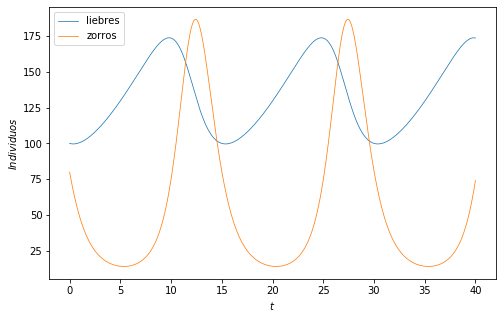

In [16]:
# Resolución del sistema LV

def lotkavolterra( x, t, rl, alpha, rz, beta):              # x[0] liebres, x[1] zorros
    return np.array([rl*x[0] - alpha*x[0]*x[1], -rz*x[1] + beta*x[0]*x[1]])

t = np.linspace(0, 40, 500)
xinit = (100,80)
rl = 0.1
alpha = 0.0015
rz = 2
beta = 0.015
lvsol = odeint(lotkavolterra, xinit, t, args=(rl,alpha,rz,beta))
plt.figure(figsize=(8,5)) 
plt.xlabel('$t$')
plt.ylabel('$Individuos$')
plt.plot(t, lvsol[:,0],linewidth=0.75)
plt.plot(t, lvsol[:,1],linewidth=0.75)
plt.legend(["liebres","zorros"])

La solución es oscilatoria, con los máximos desfasdados. Ambas especies se necesitan para sobrevivir. En el diagrama de fases aparece un ciclo límite.

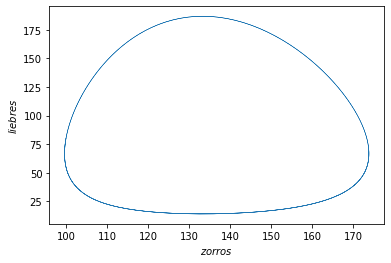

In [17]:
plt.xlabel('$zorros$')
plt.ylabel('$liebres$')
plt.plot(lvsol[:,0], lvsol[:,1],linewidth=0.5)



### Modelo de epidemia SIR

El modelo ***SIR*** fue propuesto por Kermack y McKendric en 1927 y describe cómo se extiende una epidemia en una población "N", usando tres magnitudes: "S" ("Susceptible", población sana pero no inmune al patógeno), "I" ("Infectado" población infectada y contagiadora), "R" ("Recuperado" población curada e inmunizada). Las tres se miden en número de individuos y se cumple en todo momento que $S+R+I = N$. Se supone que no hay vacuna y nadie muere.

Las ecuaciones diferenciales son:

$dS/dt = −βSI/N$

$dI/dt = βSI/N−γI$

$dR/dt = γI$

La primera ecuación indica que la variación del número de individuos no inmunes es el producto de contagios entre Susceptibles e Infectados, que se encuentran con una tasa β y con una probabilidad de contagio $1$, dividido por el total de la población. Inicialmente todos los habitantes menos uno están sanos pero no son inmunes, este número solo puede disminuir.

La segunda ecuación es la variación de infectados, que crecen conforme los pacientes Susceptibles se Infectan al ritmo que determina la primera ecuación, pero además puede disminuir cuando el sistema inmunológico hace su trabajo y un Infectado se Recupera y se inmuniza (segundo término).

La tercera, que el número de individuos recuperados es proporcional al de infectados. La fracción γ (γ<1) es la velocidad de recuperación de los enfermos.

Al cociente $β/γ$ se le denomina tasa de reproducción o $R_{0}$, si es mayor que $1$ la infección se extiende por toda la población, si es inferior se extingue. Puede actuarse aumentando el denominador (reduciendo el tiempo de recuperación encontrando una cura) o disminuyendo el numerador, al rebajar el número de contactos con una cuarentena.

Si existe vacuna el modelo $SIR$ simple ya no sirve, en ese caso hay que incluir una nueva ecuación que representa el número de individuos que pasan directamente de "S" a "R" al inmunizarse.

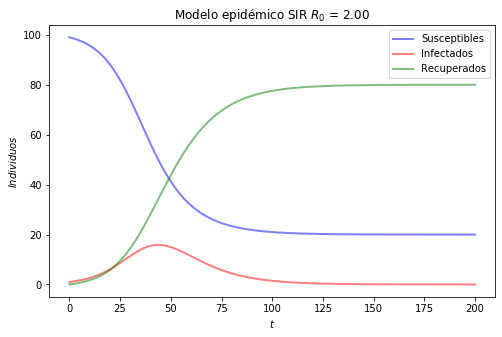

In [18]:
# Código adaptado de 
# https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

# Población total. Ponemos 100 y así la traducción a porcentaje es inmediata
N = 100
I0, R0 = 1, 0  # Inicialmente hay un infectado y ningún recuperado. No confundir R0 con la
               # tasa de reproducción, aquí es el número de infectados en t = 0
S0 = N - I0 - R0   # Susceptibles de infección
beta, gamma = 0.2, 1./10     # Tasas de encuentro (adimensional) y recuperación (1/días)
t = np.linspace(0, 200, 200)

# Función que describe el sistema de ecuaciones diferenciales
def deriv(y, t, N, beta, gamma):
    S, I, R = y             # valores en el instante t
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0             # Condiciones iniciales

ret = odeint(deriv, y0, t, args=(N, beta, gamma))  # Integración con odeint
S, I, R = ret.T

plt.figure(figsize=(8,5)) 
plt.xlabel('$t$')
plt.ylabel('$Individuos$')
plt.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptibles')
plt.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
plt.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
plt.title("Modelo epidémico SIR $R_0$ = {:.2f}".format(beta/gamma))
plt.legend()
plt.show()

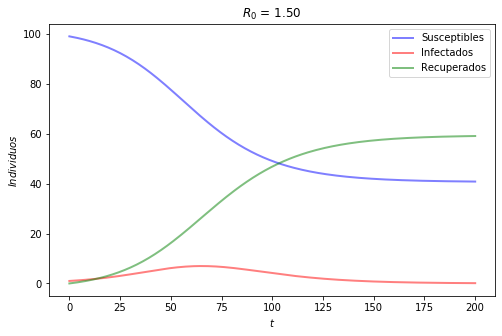

In [19]:
beta, gamma = 0.15, 1./10     # Efecto bajando R0
y0 = S0, I0, R0             # Condiciones iniciales

ret = odeint(deriv, y0, t, args=(N, beta, gamma))  # Integración con odeint
S, I, R = ret.T

plt.figure(figsize=(8,5)) 
plt.xlabel('$t$')
plt.ylabel('$Individuos$')
plt.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptibles')
plt.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
plt.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
plt.title("$R_0$ = {:.2f}".format(beta/gamma))
plt.legend()
plt.show()

---

<font size="1" color="grey">
    (c) 2020 Javier García Algarra. <a href='https://www.u-tad.com'>www.u-tad.com</a> <br>
Licensed under a Creative Commons Reconocimiento 4.0 Internacional License
</font> 